### Imports

In [134]:
import numpy as np
import matplotlib.pyplot as plt

### Function to generate a vector with randomized noise

In [135]:
def generate_vector(signal_mean, noise_variance, length=10240):
    signal = np.ones(length) * signal_mean
    noise = np.random.normal(0, np.sqrt(noise_variance), length)
    vector = signal + noise
    return vector

### Function to calculate SNR

In [136]:
def calculate_snr(binned_signal, axis=0, ddof=0):
    binned_signal = np.asanyarray(binned_signal)
    mean = binned_signal.mean(axis)
    standard_deviation = binned_signal.std(axis=axis, ddof=ddof)
    return 10*np.log10(abs(np.where(standard_deviation == 0, 0, mean/standard_deviation)))

### Function to perform binning and calculate SNR for each binning level

In [137]:
def perform_binning_and_snr(signal, binning_factor):
    binned_signal = np.mean(signal.reshape(-1, binning_factor), axis=1)
    return calculate_snr(binned_signal)

### Parameters

In [138]:
signal_mean = 100.0
noise_variances = [5.0, 50.0, 500.0]  # Different noise levels
num_replications = 25
binning_factors = [2, 4, 8, 16, 32, 64, 128, 256]

# Results storage
snr_results = np.zeros((len(binning_factors), len(noise_variances), num_replications))

### Main Loop

In [139]:
for rep in range(num_replications):
    for noise_var_idx, noise_variance in enumerate(noise_variances):
        vector = generate_vector(signal_mean, noise_variance)
        for binning_idx, binning_factor in enumerate(binning_factors):
            snr = perform_binning_and_snr(vector, binning_factor)
            snr_results[binning_idx, noise_var_idx, rep] = snr

### Plot

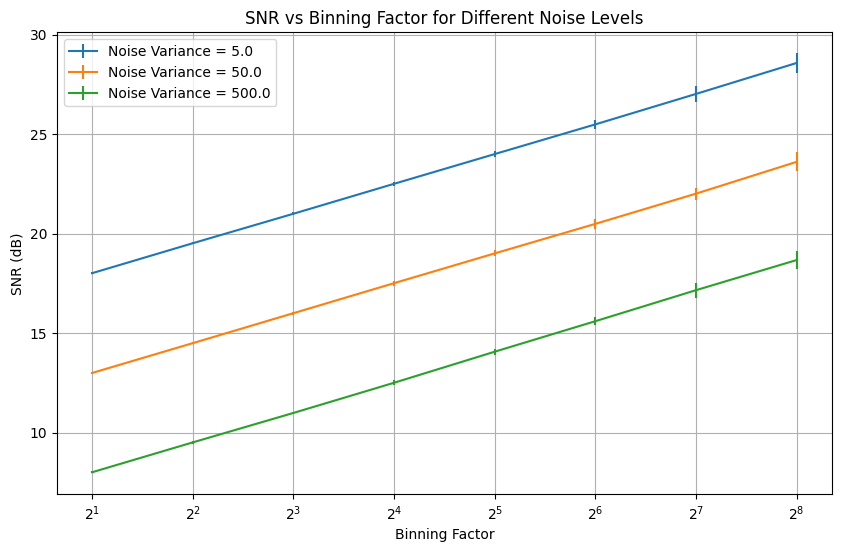

In [140]:
mean_snr = np.mean(snr_results, axis=2)
std_snr = np.std(snr_results, axis=2)

# Plotting
plt.figure(figsize=(10, 6))
for noise_var_idx, noise_variance in enumerate(noise_variances):
    plt.errorbar(binning_factors, mean_snr[:, noise_var_idx], yerr=std_snr[:, noise_var_idx],
                 label=f'Noise Variance = {noise_variance}')

plt.xscale('log', base=2)
plt.xlabel('Binning Factor')
plt.ylabel('SNR (dB)')
plt.title('SNR vs Binning Factor for Different Noise Levels')
plt.legend()
plt.grid(True)
plt.show()

In [141]:
snr_results

array([[[18.0878766 , 18.03413683, 18.03346785, 17.98400898,
         18.03844691, 18.05017846, 17.97506854, 18.02113461,
         18.04492002, 18.02892846, 17.94970396, 18.03743589,
         18.10845175, 17.97625478, 17.95595249, 18.05065174,
         17.97528642, 18.01854007, 18.01001515, 18.06752218,
         17.99528438, 18.00184248, 17.97360877, 17.95685385,
         18.07199334],
        [13.02267246, 12.96312764, 12.99814156, 12.97941916,
         13.02596498, 13.03069135, 13.05503429, 13.07498794,
         12.96734747, 13.02988515, 13.05834612, 12.98490426,
         12.99618396, 13.02344931, 13.02950752, 13.01216554,
         12.94447507, 13.03727469, 12.96954728, 13.027047  ,
         12.9842396 , 13.00390016, 12.93475352, 12.9950489 ,
         12.94195097],
        [ 8.04129607,  7.93065633,  7.97512281,  7.92217333,
          8.06324365,  7.99205183,  8.01239349,  8.0998823 ,
          7.96681383,  8.03595284,  8.02327238,  7.96810697,
          7.97147193,  8.02052772,  7.9